In [56]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.1):
    return np.where(x > 0, x, alpha * x)

def softmax(x):
    e_x = np.exp(x - x.max(axis=1, keepdims=True))  # Tránh tràn số
    return e_x / e_x.sum(axis=1, keepdims=True)

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def tanh_derivative(x):
    t = tanh(x)
    return 1 - t**2

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def leaky_relu_derivative(x, alpha=0.05):
    return np.where(x > 0, 1, alpha)

def softmax_derivative(x):
    return

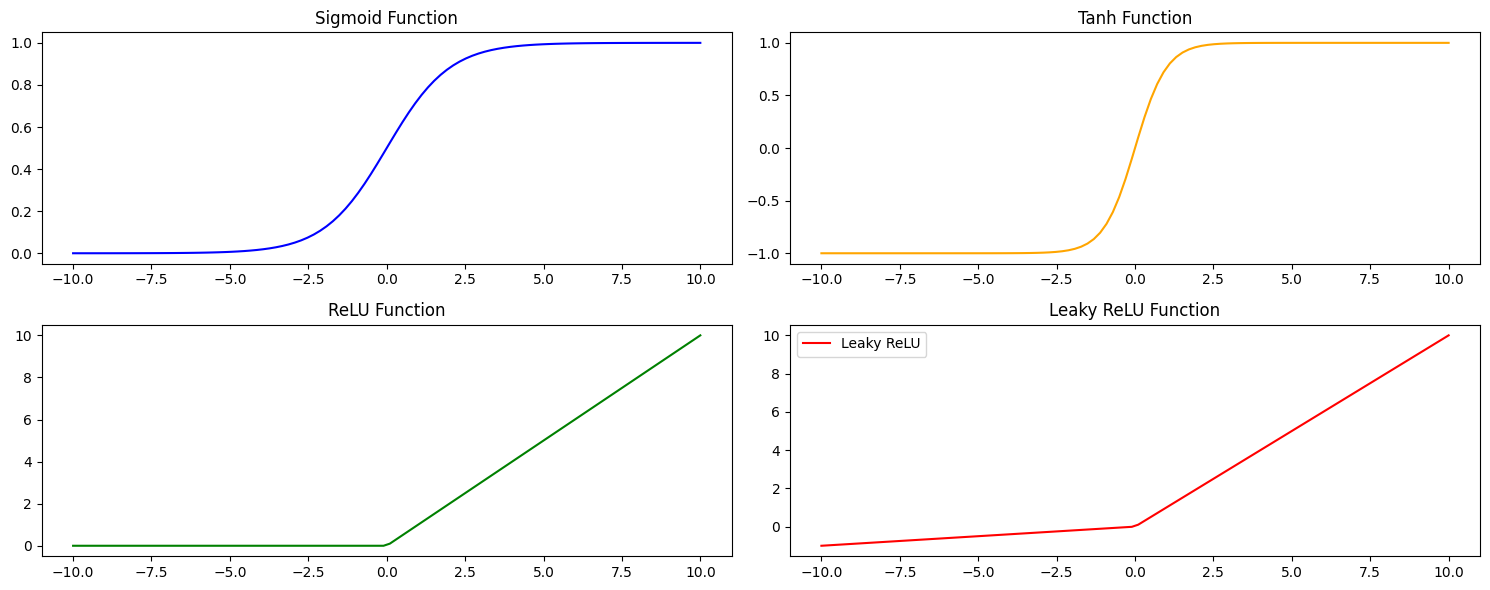

In [ ]:
# Plot sigmoid function, tanh function, relu function, and leaky relu function
import matplotlib.pyplot as plt
x_values = np.linspace(-10, 10, 100)
plt.figure(figsize=(15, 6))
plt.subplot(2, 2, 1)
plt.plot(x_values, sigmoid(x_values), color='blue')
plt.title('Sigmoid Function')
plt.subplot(2, 2, 2)
plt.plot(x_values, tanh(x_values), color='orange')
plt.title('Tanh Function')
plt.subplot(2, 2, 3)
plt.plot(x_values, relu(x_values), color='green')
plt.title('ReLU Function')
plt.subplot(2, 2, 4)
plt.plot(x_values, leaky_relu(x_values), color='red')
plt.title('Leaky ReLU Function')
plt.tight_layout()
plt.show()

In [ ]:
def generate_weights_biases(ith_layer, num_nodes_prev_layer, num_current_nodes):
    np.random.seed(0)
    weights = np.random.rand(num_nodes_prev_layer, num_current_nodes)
    return weights

def backward_propagation(prev_activations, activations, biases, target):
    m = activations.shape[0]  # Số lượng mẫu
    derivative = sigmoid_derivative(activations)
    error = activations - target
    delta = error * derivative
    return delta / m

Epoch 0, Loss: 0.6935
Epoch 1000, Loss: 0.0094
Epoch 2000, Loss: 0.0060
Epoch 3000, Loss: 0.0048
Epoch 4000, Loss: 0.0040
Epoch 5000, Loss: 0.0036
Epoch 6000, Loss: 0.0032
Epoch 7000, Loss: 0.0030
Epoch 8000, Loss: 0.0028
Epoch 9000, Loss: 0.0026
Epoch 9999, Loss: 0.0024

--- Final Results ---
Input: [0 0], Expected: 0, Predicted: 0, Probability: 0.0024
Input: [1 0], Expected: 1, Predicted: 1, Probability: 0.9970
Input: [0 1], Expected: 1, Predicted: 1, Probability: 0.9982
Input: [1 1], Expected: 0, Predicted: 0, Probability: 0.0026
Accuracy: 100.00%


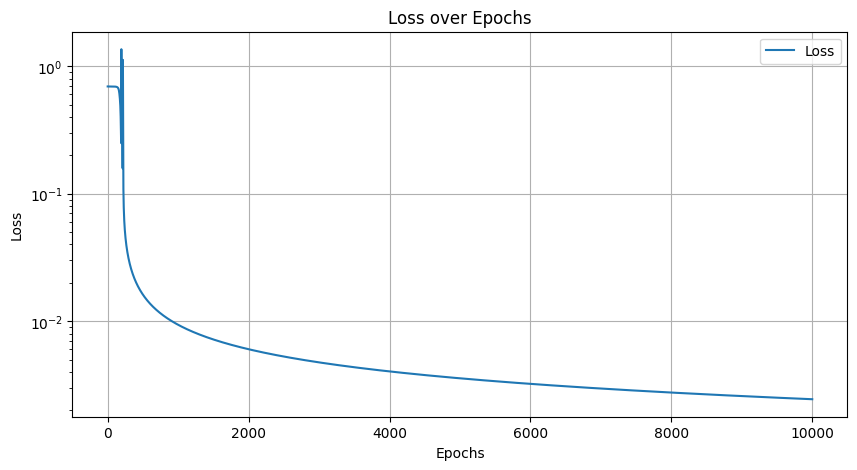

In [ ]:
def XOR_train(x_mau, y_mau, max_iterations, lr):
    N = x_mau.shape[0]  # Number of samples
    
    # Add bias term (column of ones) to x and transpose
    ones_column = np.ones((N, 1))
    x_in = np.hstack((ones_column, x_mau)).T  # (num_features + 1, N)
    num_in_feature_incl_bias = x_in.shape[0] # Number of input features including bias
    y_target = y_mau.T  # Transpose y_mau to match the shape of output layer
    num_hidden_nodes = 3 # Number of nodes in each hidden layer

    # Initialize weights
    w1 = np.random.uniform(-1, 1, (num_hidden_nodes, num_in_feature_incl_bias))
    w2 = np.random.uniform(-1, 1, (num_hidden_nodes, num_hidden_nodes))
    w3 = np.random.uniform(-1, 1, (1, num_hidden_nodes))

    loss = [] # To store the loss of the last epoch

    for epoch in range(max_iterations):
        # Forward pass
        # Layer 1
        n1 = np.dot(w1, x_in)
        H1 = sigmoid(n1)
        
        # Layer 2
        n2 = np.dot(w2, H1)
        H2 = sigmoid(n2)

        # Layer 3 (output layer)
        n3 = np.dot(w3, H2)
        H3 = sigmoid(n3)

        # Calculate loss (Binary Cross-Entropy)
        J = -(y_target * np.log(H3) + (1 - y_target) * np.log(1 - H3))
        current_loss = np.mean(J)
        loss.append(current_loss)

        # Print loss periodically
        if epoch % 1000 == 0 or epoch == max_iterations -1:
            print(f"Epoch {epoch}, Loss: {current_loss:.4f}")

        # Backpropagation
        # Delta for output layer
        
        delta3 = (H3 - y_target) * sigmoid_derivative(n3)
        dw3 = np.dot(delta3, H2.T) / N

        # Delta for hidden layer 2
        delta2 = np.dot(w3.T, delta3) * sigmoid_derivative(n2)
        dw2 = np.dot(delta2, H1.T) / N

        # Delta for hidden layer 1
        delta1 = np.dot(w2.T, delta2) * sigmoid_derivative(n1)
        dw1 = np.dot(delta1, x_in.T) / N
        
        # Update weights
        w3 -= lr * dw3
        w2 -= lr * dw2
        w1 -= lr * dw1

    # Transpose H3 back to (N, 1) for consistency with y_mau in the output loop
    final_output_probs = H3.T
    final_predictions = np.round(final_output_probs)
    
    return final_output_probs, final_predictions, loss

x_mau = np.array([
    [0, 0],
    [1, 0],
    [0, 1],
    [1, 1]
])
y_mau = np.array([[0], [1], [1], [0]])

num_samples = x_mau.shape[0]
num_in_features = x_mau.shape[1]
num_out_features = y_mau.shape[1]

# Huấn luyện
output_probs, predictions, final_loss = XOR_train(x_mau, y_mau, max_iterations=10000, lr=20)

# Kết quả
print("\n--- Final Results ---")
for i in range(x_mau.shape[0]):
    print(f"Input: {x_mau[i]}, Expected: {y_mau[i][0]}, Predicted: {int(predictions[i][0])}, Probability: {output_probs[i][0]:.4f}")

# Check accuracy
accuracy = np.mean(predictions == y_mau) * 100
print(f"Accuracy: {accuracy:.2f}%")

# Plot loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(final_loss, label='Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.yscale('log')  # Log scale for better visibility
plt.show()

In [161]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def train_xor_multi_hidden(x, y, n_hidden=4, epochs=10000, lr=0.1):
    input_size = x.shape[1]
    output_size = y.shape[1]

    # Khởi tạo trọng số
    w1 = np.random.uniform(-1, 1, (input_size, n_hidden))
    b1 = np.random.uniform(-1, 1, (1, n_hidden))
    w2 = np.random.uniform(-1, 1, (n_hidden, output_size))
    b2 = np.random.uniform(-1, 1, (1, output_size))

    for epoch in range(epochs):
        # Forward pass
        z1 = np.dot(x, w1) + b1           # (batch_size, n_hidden)
        a1 = sigmoid(z1)

        z2 = np.dot(a1, w2) + b2          # (batch_size, output_size)
        a2 = sigmoid(z2)

        # Loss (binary cross-entropy)
        loss = -np.mean(y * np.log(a2) + (1 - y) * np.log(1 - a2))

        # Backpropagation
        dz2 = a2 - y                      # (batch_size, output_size)
        dw2 = np.dot(a1.T, dz2) / x.shape[0]
        db2 = np.sum(dz2, axis=0, keepdims=True) / x.shape[0]

        dz1 = np.dot(dz2, w2.T) * sigmoid_derivative(z1)  # (batch_size, n_hidden)
        dw1 = np.dot(x.T, dz1) / x.shape[0]
        db1 = np.sum(dz1, axis=0, keepdims=True) / x.shape[0]

        # Cập nhật trọng số
        w2 -= lr * dw2
        b2 -= lr * db2
        w1 -= lr * dw1
        b1 -= lr * db1

    return w1, b1, w2, b2, loss

def predict(x, w1, b1, w2, b2):
    z1 = np.dot(x, w1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, w2) + b2
    a2 = sigmoid(z2)
    return np.round(a2)

# Dữ liệu XOR
x = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([
    [0],
    [1],
    [1],
    [0]
])

# Huấn luyện với 4 neuron tầng ẩn
w1, b1, w2, b2, loss = train_xor_multi_hidden(x, y, n_hidden=16, epochs=10000, lr=17)

# Dự đoán
predictions = predict(x, w1, b1, w2, b2)

for i in range(len(x)):
    print(f"Input: {x[i]}, Expected: {y[i][0]}, Predicted: {int(predictions[i][0])}")

print(f"Loss cuối cùng: {loss}")

Input: [0 0], Expected: 0, Predicted: 0
Input: [0 1], Expected: 1, Predicted: 1
Input: [1 0], Expected: 1, Predicted: 1
Input: [1 1], Expected: 0, Predicted: 0
Loss cuối cùng: 5.625676411459504e-05


In [52]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Tạo dữ liệu ngẫu nhiên
data = np.random.rand(1000, 5)

# Xây dựng mô hình Autoencoder
input_layer = Input(shape=(5,))
encoded = Dense(10, activation='relu')(input_layer)
layer2 = Dense(20, activation='relu')(encoded)
layer3 = Dense(50, activation='relu')(layer2)
layer4 = Dense(100, activation='relu')(layer3)
decoded = Dense(5, activation='sigmoid')(layer4)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Huấn luyện mô hình
autoencoder.fit(data, data, epochs=50, batch_size=32)

# Kiểm tra kết quả
compressed_data = autoencoder.predict(data)
print("Dữ liệu gốc:", data[0])
print("Dữ liệu tái tạo:", compressed_data[0])

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0831   
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0664 
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0442 
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0311 
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0231 
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0154 
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0073 
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0031 
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0024 
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0017 
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0017 
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0014 
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0012 
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0012 
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0012 
Ep